<h1 style='color:#087EB0; font-size:150%'> Import Library </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/obesity-prediction/obesity_data.csv')
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [4]:
df.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [7]:
num_cols = df.select_dtypes(include= ["int64", "float64"]).columns

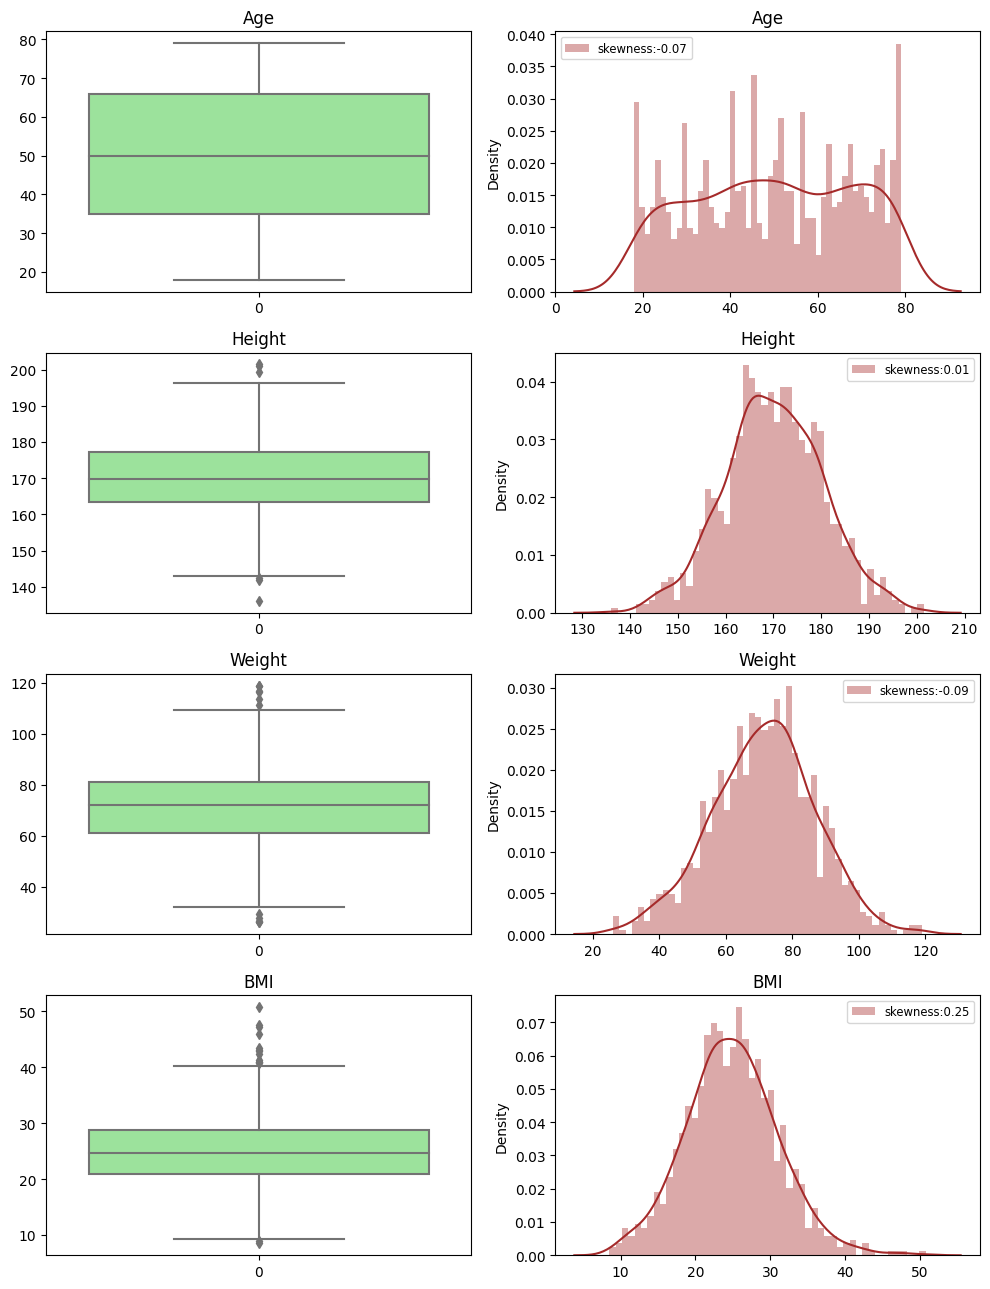

In [8]:
plt.figure(figsize=(10,13))
j = 1
for i in num_cols[:-1]:
    plt.subplot(4,2, j)
    sns.boxplot(df[i], color="lightgreen")
    plt.title(f"{i}")
    plt.subplot(4,2, j+1)
    sns.distplot(df[i], color="brown", bins=50, label=f"skewness:{df[i].skew().round(2)}")
    plt.title(f"{i}"), plt.xlabel("")
    j += 2
    plt.legend(fontsize="small")
plt.tight_layout()
plt.show()

In [9]:
df.head(2)

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese


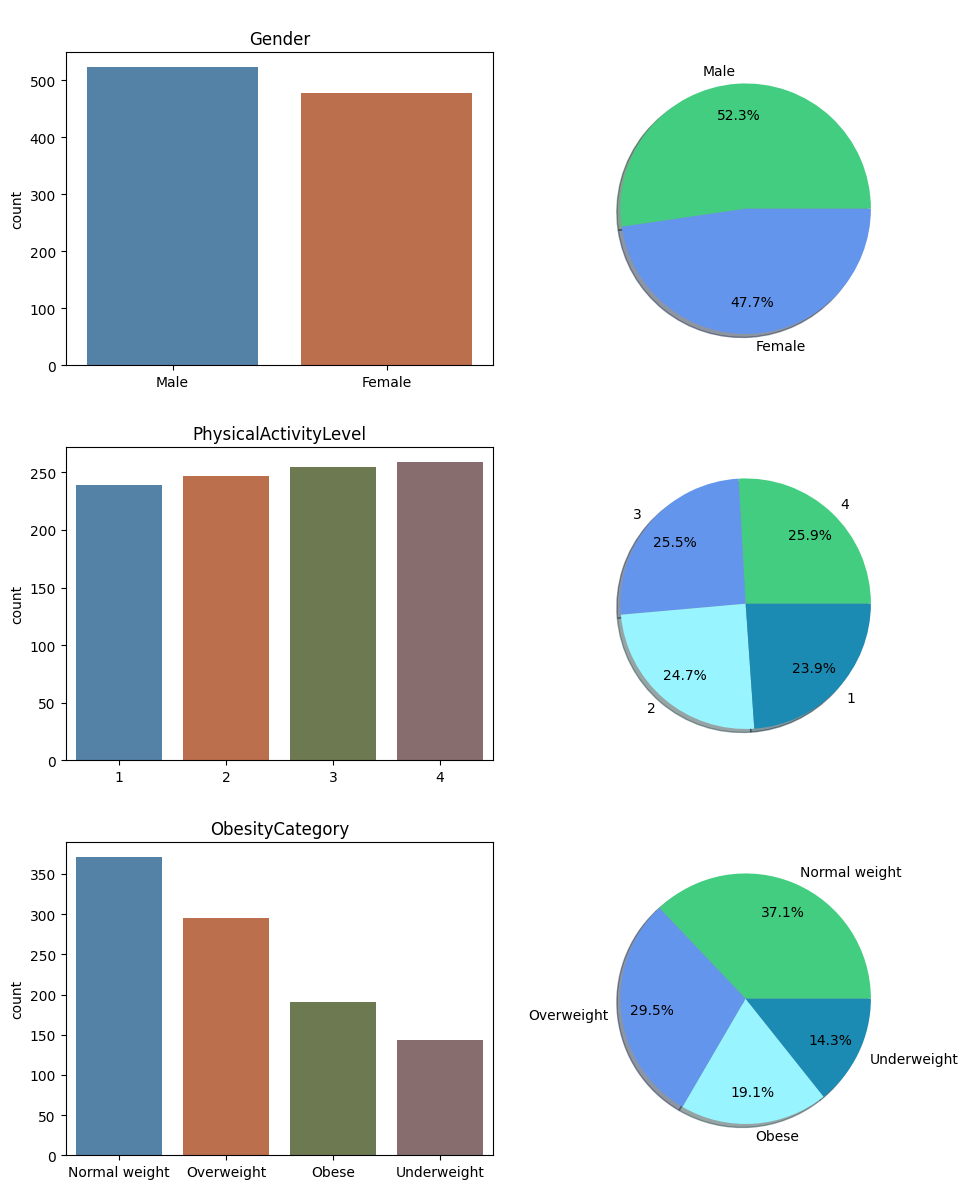

In [10]:
df["Gender"].value_counts().index

plt.figure(figsize=(10,12))
j = 1
for i in ["Gender", "PhysicalActivityLevel", "ObesityCategory"]:
    plt.subplot(3,2, j)
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette=["#4682b4", "#cd6839", "#6f804a", "#8b6969"])
    plt.xlabel("")
    plt.title(f"\n{i}")
    plt.subplot(3,2, j+1)
    plt.pie(x=df[i].value_counts(), labels=df[i].value_counts().index, autopct='%.1f%%',
            colors=["#43cd80", "#6495ed","#98f5ff", "#1b8bb4"], pctdistance=0.75, shadow=True)
    j += 2
plt.tight_layout()
plt.show()

<h1 style='color:#087EB0; font-size:150%'> Correlation between numerical variables </h1>

In [11]:
df_corr = df.drop(["Gender", "ObesityCategory"], axis=1).corr()
df_corr

,Age,Height,Weight,BMI,PhysicalActivityLevel
Age,1.000000,0.019647,-0.061400,-0.059971,-0.022308
Height,0.019647,1.000000,0.016033,-0.477091,0.030380
Weight,-0.061400,0.016033,1.000000,0.861438,0.063406
BMI,-0.059971,-0.477091,0.861438,1.000000,0.038020
PhysicalActivityLevel,-0.022308,0.030380,0.063406,0.038020,1.000000


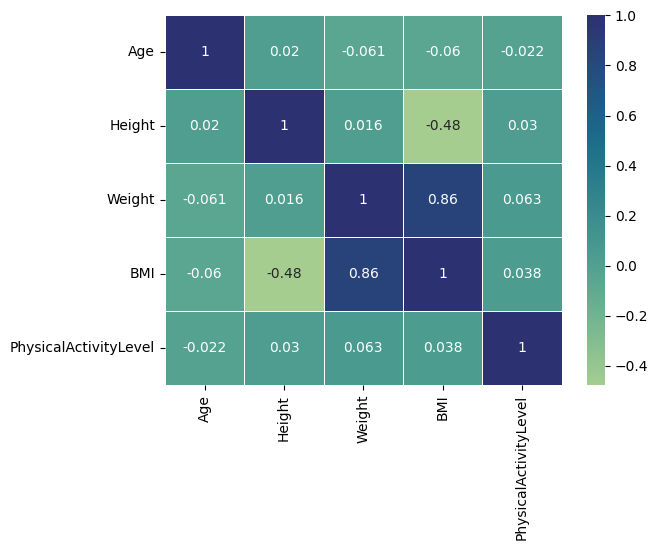

In [12]:
sns.heatmap(df_corr, annot=True, lw=0.4, cmap="crest")
plt.show()

<h1 style='color:#087EB0; font-size:150%'> Encoding </h1>

In [13]:
le = LabelEncoder()
df["Gender"] = df[["Gender"]].apply(le.fit_transform)

<h1 style='color:#087EB0; font-size:150%'> Split (train/test) </h1>

In [14]:
y = df["ObesityCategory"]
X = df.drop("ObesityCategory", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h1 style='color:#087EB0; font-size:150%'> Standardization </h1>

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style='color:#087EB0; font-size:150%'> Models & Predictions </h1>

In [16]:
model_list = [RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
              SVC(), MLPClassifier(), CatBoostClassifier(verbose=False)]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train_scaled, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    model_name_list.append(model_name)
    model_accuracies.append(accuracy)
    
    print(f"{model_name} accuracy: {accuracy:.3f}\n")

RandomForestClassifier accuracy: 1.000

LogisticRegression accuracy: 0.956

KNeighborsClassifier accuracy: 0.820

SVC accuracy: 0.932

MLPClassifier accuracy: 0.944

CatBoostClassifier accuracy: 0.992



<h1 style='color:#087EB0; font-size:150%'> Accuracy values of the models </h1>

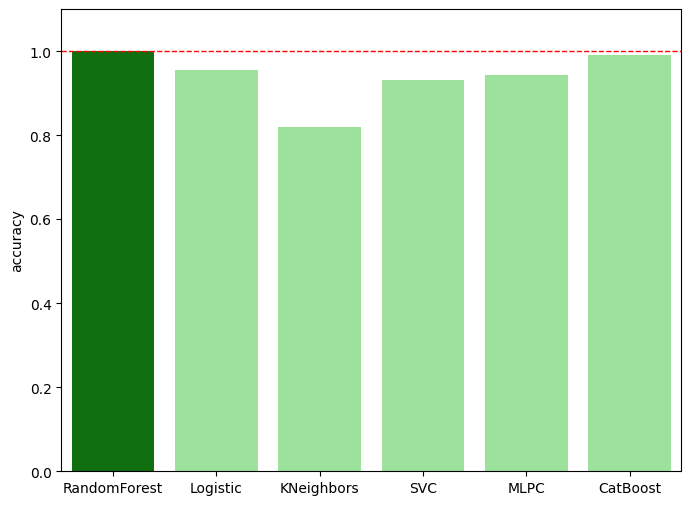

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
cols = ["lightgreen" if i < (max(model_accuracies)) else "green" for i in model_accuracies]
sns.barplot(x=model_name_list, y=model_accuracies, ax=ax, palette=cols)
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.axhline(1, lw=1, ls="--", color="red")
ax.set_xticklabels(["RandomForest", "Logistic", "KNeighbors", "SVC", "MLPC", "CatBoost"])
#plt.title("accuracy values of models", fontsize=18, color="b")
plt.show()

<h1 style='color:#087EB0; font-size:150%'> RandomForest Confusion Matrix </h1>

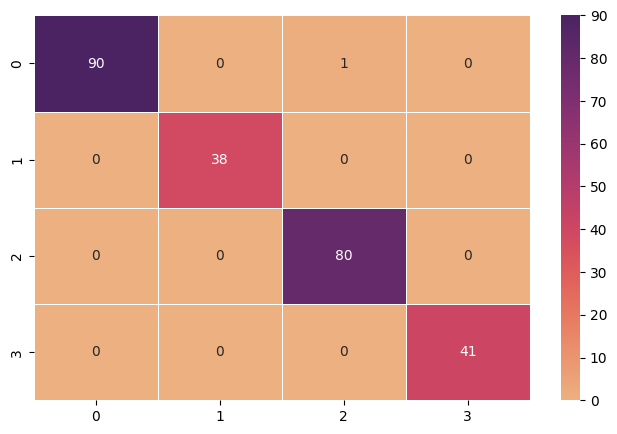

In [18]:
rf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, linewidths=0.6, cmap="flare", fmt='.2g')
#plt.title("RandomForest Confusion Matrix", fontsize=18)
plt.show()

In [19]:
print(f"------------RANDOMFOREST CLASSIFICATION REPORT-------------\n{classification_report(y_test, y_pred_rf)}")

------------RANDOMFOREST CLASSIFICATION REPORT-------------
               precision    recall  f1-score   support

Normal weight       1.00      0.99      0.99        91
        Obese       1.00      1.00      1.00        38
   Overweight       0.99      1.00      0.99        80
  Underweight       1.00      1.00      1.00        41

     accuracy                           1.00       250
    macro avg       1.00      1.00      1.00       250
 weighted avg       1.00      1.00      1.00       250

